In [6]:
from AutoencoderLinearDecoder import AutoencoderLinearDecoder, get_prox_operator, train_autoencoder
import torch
import scanpy as sc
import numpy as np

import slalom as sl

In [2]:
adata = sc.read('mouse_retina_sbs.h5ad')

In [4]:
select_genes = adata.varm['I'].sum(1)>0
adata._inplace_subset_var(select_genes)
adata.X-=adata.X.mean(0)

In [7]:
LR = 0.001
BATCH_SIZE = 62
N_EPOCHS = 40

ALPHA0 = 0.1

ALPHA1 = 0.95*LR
ALPHA2 = 0.55*LR
I = torch.from_numpy(adata.varm['I'])
OMEGA = torch.ones(len(adata.uns['terms']))

In [19]:
autoencoder = AutoencoderLinearDecoder(adata.n_vars, len(adata.uns['terms']))

In [20]:
prox_operator = get_prox_operator(I, ALPHA1, ALPHA2, OMEGA)

In [21]:
train_autoencoder(adata, autoencoder, ALPHA0, LR, BATCH_SIZE, N_EPOCHS, prox_operator)

Epoch: 0 | batch train loss: 434.0806
Epoch: 0 | batch train loss: 158.7161
Epoch: 0 | batch train loss: 149.7678
Epoch: 0 -- total train loss: 143.4349=142.8656+5.6929
Number of deactivated terms: 0
Number of deactivated genes: 127184
Epoch: 1 | batch train loss: 154.4285
Epoch: 1 | batch train loss: 157.7775
Epoch: 1 | batch train loss: 151.3824
Epoch: 1 -- total train loss: 126.6737=125.9173+7.5640
Number of deactivated terms: 0
Number of deactivated genes: 128577
Epoch: 2 | batch train loss: 139.5788
Epoch: 2 | batch train loss: 121.6367
Epoch: 2 | batch train loss: 130.3584
Epoch: 2 -- total train loss: 117.1288=116.3760+7.5288
Number of deactivated terms: 4
Number of deactivated genes: 128971
Epoch: 3 | batch train loss: 141.0260
Epoch: 3 | batch train loss: 125.4035
Epoch: 3 | batch train loss: 113.0956
Epoch: 3 -- total train loss: 111.3833=110.6387+7.4459
Number of deactivated terms: 6
Number of deactivated genes: 129012
Epoch: 4 | batch train loss: 122.6511
Epoch: 4 | batch t

Epoch: 34 -- total train loss: 96.7970=96.3850+4.1201
Number of deactivated terms: 20
Number of deactivated genes: 129374
Epoch: 35 | batch train loss: 102.2915
Epoch: 35 | batch train loss: 106.7643
Epoch: 35 | batch train loss: 114.8708
Epoch: 35 -- total train loss: 96.7264=96.3165+4.0991
Number of deactivated terms: 21
Number of deactivated genes: 129421
Epoch: 36 | batch train loss: 104.7550
Epoch: 36 | batch train loss: 107.0276
Epoch: 36 | batch train loss: 113.3714
Epoch: 36 -- total train loss: 96.6406=96.2294+4.1126
Number of deactivated terms: 22
Number of deactivated genes: 129381
Epoch: 37 | batch train loss: 120.9454
Epoch: 37 | batch train loss: 116.9642
Epoch: 37 | batch train loss: 111.2511
Epoch: 37 -- total train loss: 96.5287=96.1193+4.0932
Number of deactivated terms: 22
Number of deactivated genes: 129335
Epoch: 38 | batch train loss: 113.9284
Epoch: 38 | batch train loss: 110.3225
Epoch: 38 | batch train loss: 105.1367
Epoch: 38 -- total train loss: 96.1556=95.74

In [22]:
autoencoder.decoder.weight.data.norm(p=2, dim=0)

tensor([0.0000, 1.0050, 1.0687, 1.1263, 1.3196, 1.2322, 1.3246, 0.6736, 1.2605,
        1.0751, 0.0000, 1.4847, 0.8210, 1.2251, 0.9502, 1.2464, 0.0000, 1.2215,
        0.0000, 0.0000, 0.8782, 0.8969, 1.0336, 1.4159, 1.3287, 0.8928, 0.0000,
        1.2568, 1.1542, 0.9570, 1.1535, 1.3946, 0.8639, 1.2479, 0.6521, 1.1099,
        0.9103, 1.2949, 1.4323, 1.3060, 1.1336, 1.1455, 0.0000, 1.3910, 0.0000,
        0.4731, 1.4380, 1.5733, 1.5691, 1.5174, 0.9923, 0.0000, 0.8166, 1.2475,
        1.3499, 1.1854, 1.1287, 0.0000, 1.3729, 0.0000, 0.0000, 1.2862, 1.1649,
        1.0720, 1.4936, 0.0000, 0.0000, 1.1071, 1.1356, 0.9438, 1.0785, 1.0819,
        1.0207, 0.9878, 0.8691, 1.2657, 0.0000, 0.0000, 0.7884, 0.7987, 1.0744,
        0.0000, 1.2502, 1.1867, 0.9029, 1.0560, 1.0106, 1.5590, 0.7412, 1.1430,
        1.2964, 1.2445, 0.9017, 1.3525, 1.3789, 1.0697, 1.2198, 1.2663, 1.0951,
        1.4921, 1.2412, 0.0000, 1.2000, 1.3166, 1.1090, 0.9741, 1.2491, 0.9045,
        0.7718, 0.0000, 1.2189, 1.3323, 

In [23]:
select_terms = lambda t1, t2: np.where(np.logical_or(adata.uns['terms']==t1, adata.uns['terms']==t2))[0]

In [24]:
terms = select_terms('REGULATION_OF_INSULIN_SECRETIO', 'ASTROCYTES')

In [25]:
W = autoencoder.decoder.weight.data.numpy()
(np.abs(W[:, terms])>0).sum(0)

array([15, 77])

In [26]:
autoencoder.decoder.weight.data.norm(p=2, dim=0)[terms]

tensor([1.4936, 1.7510])

In [27]:
adata.varm['I'][:, terms].sum(0)

array([14, 70])

In [28]:
encoded, decoded = autoencoder(torch.from_numpy(adata.X))
vars_latent = encoded[:, terms].data.numpy()

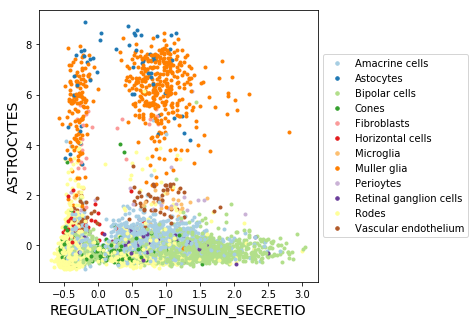

In [29]:
fg = sl.plotFactors(terms=['REGULATION_OF_INSULIN_SECRETIO', 'ASTROCYTES'], X=vars_latent, lab=adata.obs['cell_type'], isCont=False)